In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4+2

Nx = 36
Ny = 21
Nz = 5
N_parcel = 3780

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

directory = '/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_'+Years[0]+'/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_2000/Lifetime_20000101.txt


In [4]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime.shape

(5, 21, 36, 10, 12, 3)

In [5]:
for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            directory = '/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_'+Years[i_year]+'/'
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            # Strips the newline character
            data = []
            data_N = []
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0])) # total lifetime
#                 data_N.append(float(a[1]))
#                 data_S.append(float(a[2]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        
                        i = i+1

100%|██████████| 12/12 [00:04<00:00,  2.75it/s]


In [6]:
print(Ny*Nx*N_day*N_month*N_year)

272160


In [47]:

lifetime_mean = np.mean(lifetime, axis=(1,2,3,4,5))
lifetime_max  = np.max(lifetime, axis=(1,2,3,4,5))


# Life_Q1 = np.zeros(5)
# Life_90th = np.zeros(5)
# Life_99th = np.zeros(5)

# for i in range(Nz):
#     Life_Q1[i] = np.percentile(Life[i,:,:,:,:].flatten(), 25)  # Q1
#     Life_90th[i] = np.percentile(lifetime[i,:,:,:,:,:].flatten(), 99)  # Q1
#     Life_99th[i] = np.percentile(lifetime[i,:,:,:,:,:].flatten(), 99.9)  # Q1
    
    
    
# 10mean
Life_top = np.zeros(5)

for i in range(Nz):
    a = lifetime[i,:,:,:,:,:].flatten()
    a.sort()
    Num = int(len(a)*0.05)
    Life_top[i] = np.mean(a[-Num:-1])

print(Life_top)

print(0.001*Ny*Nx*N_day*N_month*N_year)

[ 520.38200926 1850.38406702 2385.52980084 2444.05578011 2463.09502462]
272.15999999999997


In [7]:
# lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season, N_year))

# for Winter
lifetime_season[:,:,:,0,:] = np.mean(lifetime[:,:,:,:,[0,1,11],:], axis=(3,4))
    
# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i,:]   = np.mean(  lifetime[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))


lifetime_season_mean = np.zeros((Nz, Ny, Nx, N_season))
for i in range(0,N_season):
    lifetime_season_mean[:,:,:,i] = np.mean(lifetime_season[:,:,:,i,:], axis=3)


Height = [16, 18, 20, 22, 24] # km

1 2 5
2 5 8
3 8 11


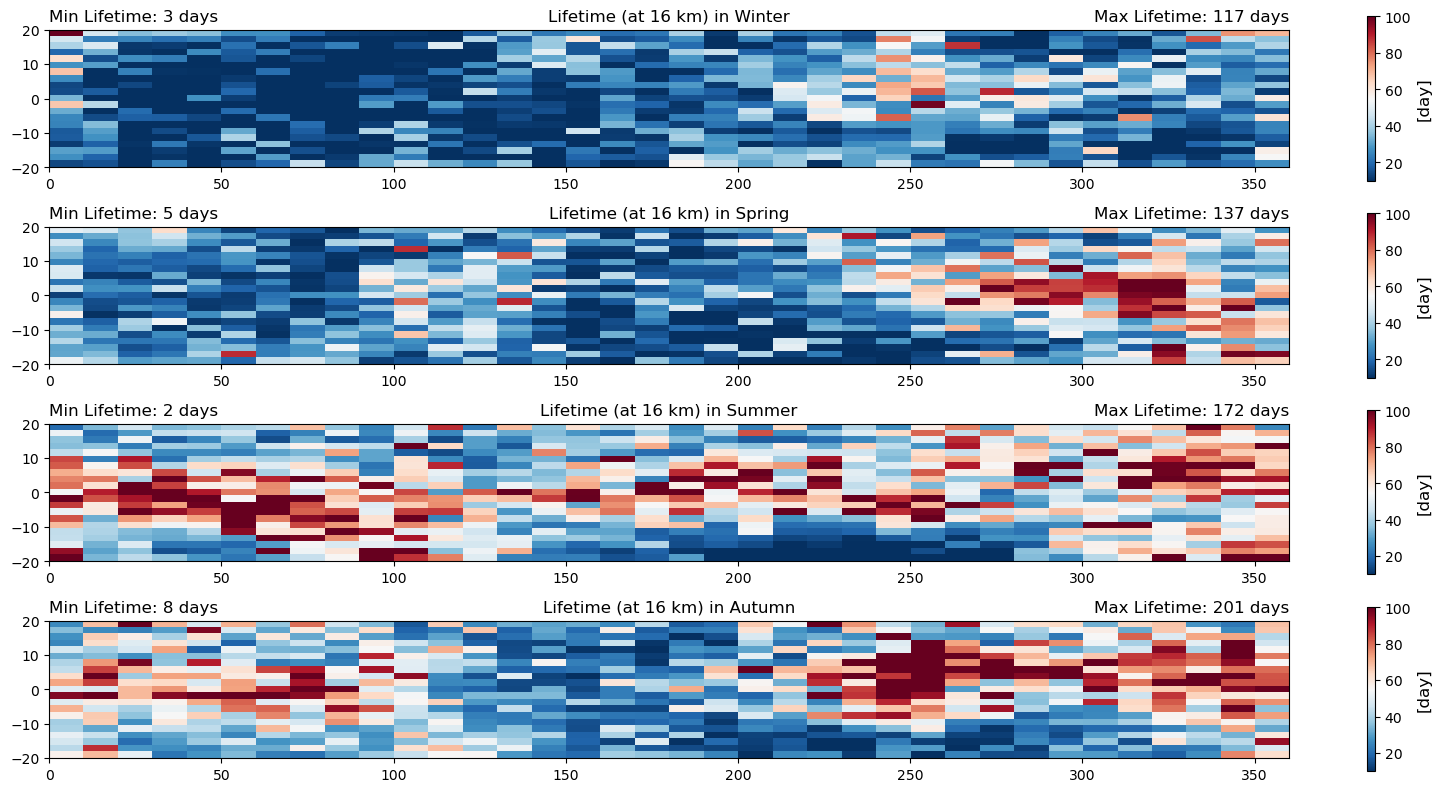

In [24]:
# 100 hPa, 16 km
iz = 0

fig = plt.figure(figsize=(20,2.5*4), dpi=100)
extent = [0 , 360 , -20 , 20]


#
ax1 = plt.subplot(4, 1, 1)
ax1_pixel = plt.imshow(lifetime_season_mean[iz,:,:,0], vmin=10, vmax=100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[day]', fontsize=12);

ax1.set_title(f"Lifetime (at {Height[iz]} km) in Winter", loc="center", fontsize=12);
ax1.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,0]))} days", loc='right', fontsize=12);
ax1.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,0]))} days", loc='left', fontsize=12);



#
ax2 = plt.subplot(4, 1, 2)
ax2_pixel = plt.imshow(lifetime_season_mean[iz,:,:,1], vmin=10, vmax=100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[day]', fontsize=12);

ax2.set_title(f"Lifetime (at {Height[iz]} km) in Spring", fontsize=12);
ax2.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,1]))} days", loc='right', fontsize=12);
ax2.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,1]))} days", loc='left', fontsize=12);


#
ax3 = plt.subplot(4, 1, 3)
ax3_pixel = plt.imshow(lifetime_season_mean[iz,:,:,2], vmin=10, vmax=100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb3 = plt.colorbar(ax3_pixel, ax=ax3)
cb3.set_label('[day]', fontsize=12);

ax3.set_title(f"Lifetime (at {Height[iz]} km) in Summer", fontsize=12);
ax3.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,2]))} days", loc='right', fontsize=12);
ax3.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,2]))} days", loc='left', fontsize=12);

#
ax4 = plt.subplot(4, 1, 4)
ax4_pixel = plt.imshow(lifetime_season_mean[iz,:,:,3], vmin=10, vmax=100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4)
cb4.set_label('[day]', fontsize=12);

ax4.set_title(f"Lifetime (at {Height[iz]} km) in Autumn", fontsize=12);
ax4.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,3]))} days", loc='right', fontsize=12);
ax4.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,3]))} days", loc='left', fontsize=12);

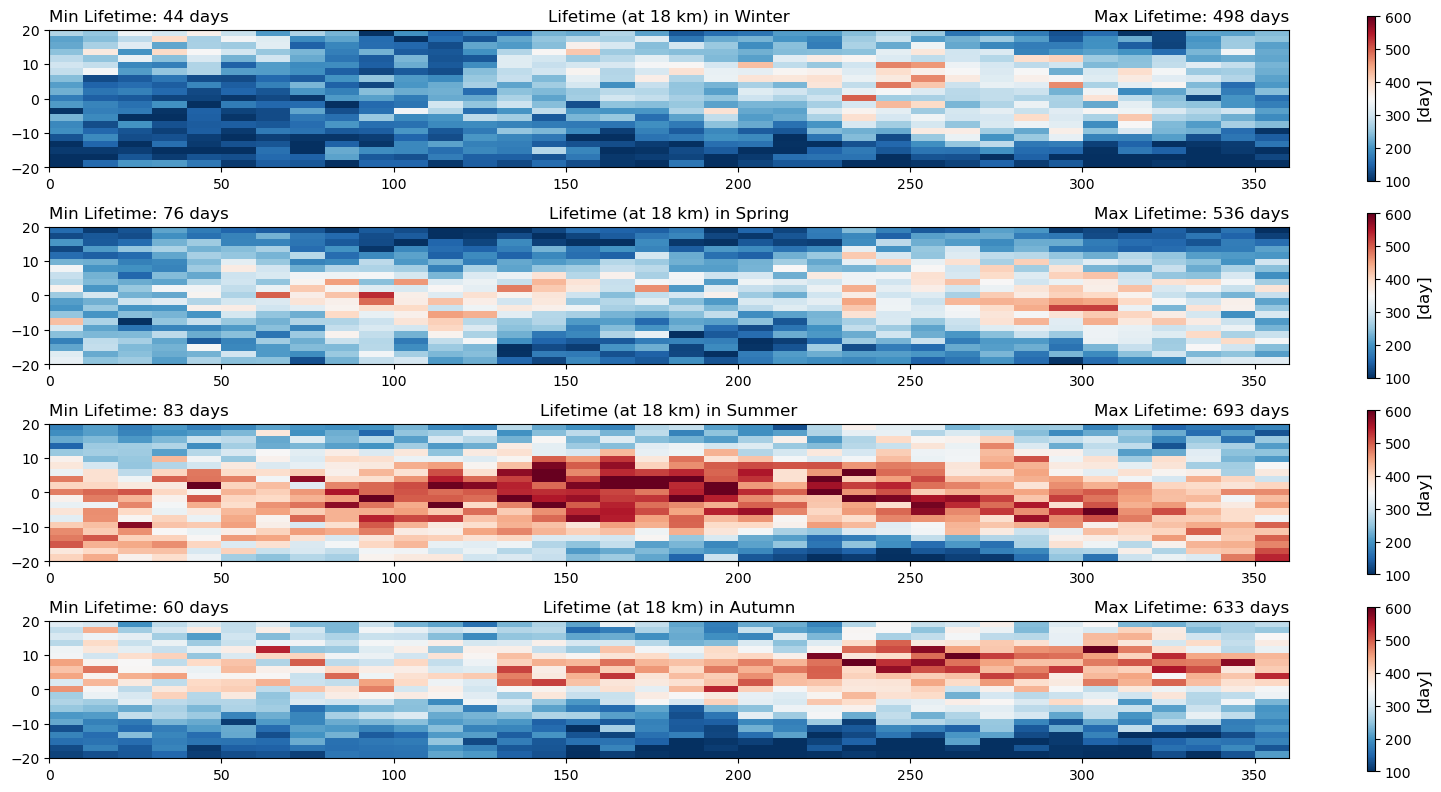

In [27]:
# 18km

iz = 1

fig = plt.figure(figsize=(20,2.5*4), dpi=100)
extent = [0 , 360 , -20 , 20]


#
ax1 = plt.subplot(4, 1, 1)
ax1_pixel = plt.imshow(lifetime_season_mean[iz,:,:,0], vmin=100, vmax=600,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[day]', fontsize=12);

ax1.set_title(f"Lifetime (at {Height[iz]} km) in Winter", fontsize=12);
ax1.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,0]))} days", loc='right', fontsize=12);
ax1.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,0]))} days", loc='left', fontsize=12);


#
ax2 = plt.subplot(4, 1, 2)
ax2_pixel = plt.imshow(lifetime_season_mean[iz,:,:,1], vmin=100, vmax=600,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[day]', fontsize=12);

ax2.set_title(f"Lifetime (at {Height[iz]} km) in Spring", fontsize=12);
ax2.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,1]))} days", loc='right', fontsize=12);
ax2.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,1]))} days", loc='left', fontsize=12);

#
ax3 = plt.subplot(4, 1, 3)
ax3_pixel = plt.imshow(lifetime_season_mean[iz,:,:,2], vmin=100, vmax=600,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb3 = plt.colorbar(ax3_pixel, ax=ax3)
cb3.set_label('[day]', fontsize=12);

ax3.set_title(f"Lifetime (at {Height[iz]} km) in Summer", fontsize=12);
ax3.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,2]))} days", loc='right', fontsize=12);
ax3.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,2]))} days", loc='left', fontsize=12);

#
ax4 = plt.subplot(4, 1, 4)
ax4_pixel = plt.imshow(lifetime_season_mean[iz,:,:,3], vmin=100, vmax=600,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4)
cb4.set_label('[day]', fontsize=12);

ax4.set_title(f"Lifetime (at {Height[iz]} km) in Autumn", fontsize=12);
ax4.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,3]))} days", loc='right', fontsize=12);
ax4.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,3]))} days", loc='left', fontsize=12);

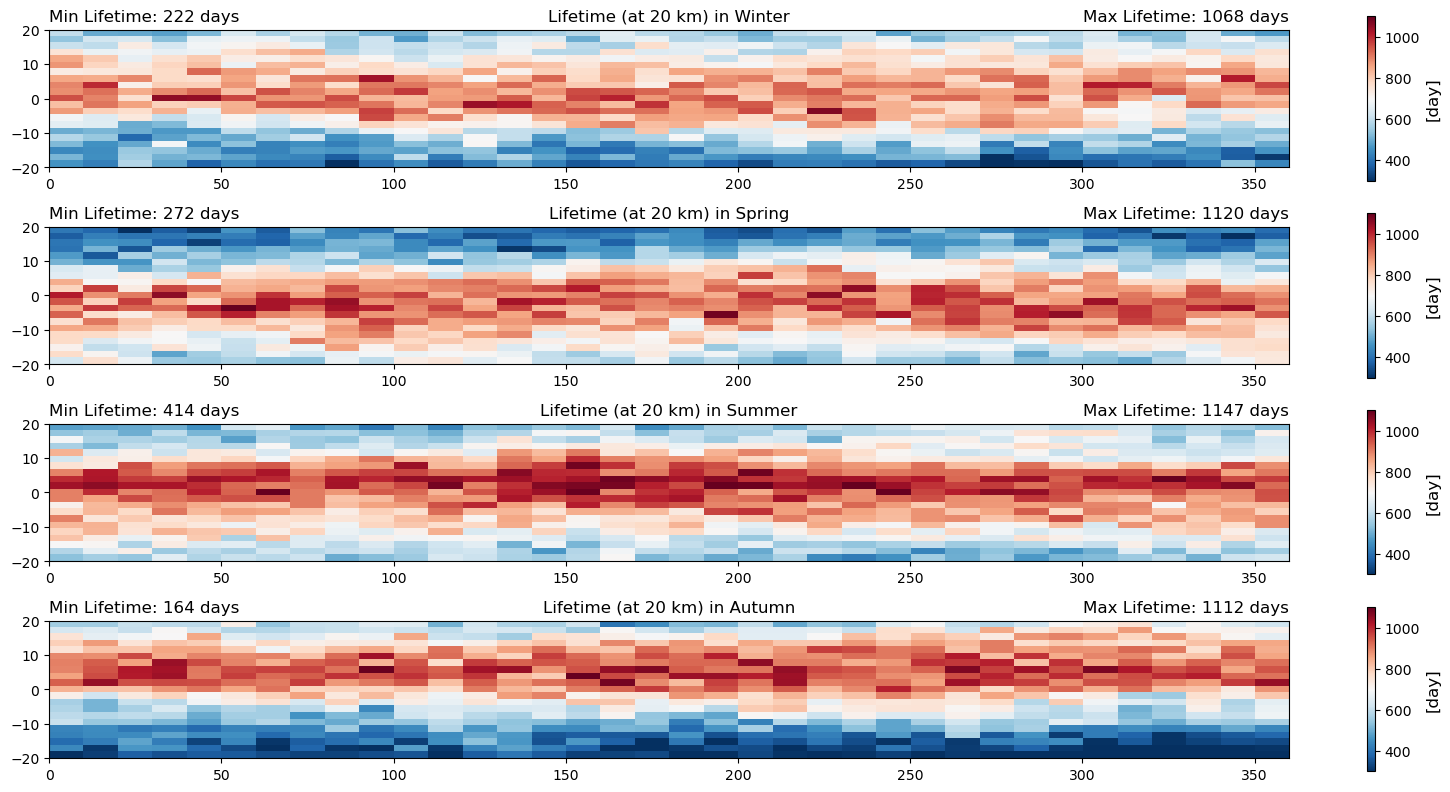

In [29]:
# 20 km

iz = 2

fig = plt.figure(figsize=(20,2.5*4), dpi=100)
extent = [0 , 360 , -20 , 20]


#
ax1 = plt.subplot(4, 1, 1)
ax1_pixel = plt.imshow(lifetime_season_mean[iz,:,:,0], vmin=300, vmax=1100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[day]', fontsize=12);

ax1.set_title(f"Lifetime (at {Height[iz]} km) in Winter", fontsize=12);
ax1.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,0]))} days", loc='right', fontsize=12);
ax1.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,0]))} days", loc='left', fontsize=12);


#
ax2 = plt.subplot(4, 1, 2)
ax2_pixel = plt.imshow(lifetime_season_mean[iz,:,:,1], vmin=300, vmax=1100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[day]', fontsize=12);

ax2.set_title(f"Lifetime (at {Height[iz]} km) in Spring", fontsize=12);
ax2.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,1]))} days", loc='right', fontsize=12);
ax2.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,1]))} days", loc='left', fontsize=12);

#
ax3 = plt.subplot(4, 1, 3)
ax3_pixel = plt.imshow(lifetime_season_mean[iz,:,:,2], vmin=300, vmax=1100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb3 = plt.colorbar(ax3_pixel, ax=ax3)
cb3.set_label('[day]', fontsize=12);

ax3.set_title(f"Lifetime (at {Height[iz]} km) in Summer", fontsize=12);
ax3.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,2]))} days", loc='right', fontsize=12);
ax3.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,2]))} days", loc='left', fontsize=12);

#
ax4 = plt.subplot(4, 1, 4)
ax4_pixel = plt.imshow(lifetime_season_mean[iz,:,:,3], vmin=300, vmax=1100,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4)
cb4.set_label('[day]', fontsize=12);

ax4.set_title(f"Lifetime (at {Height[iz]} km) in Autumn", fontsize=12);
ax4.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,3]))} days", loc='right', fontsize=12);
ax4.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,3]))} days", loc='left', fontsize=12);

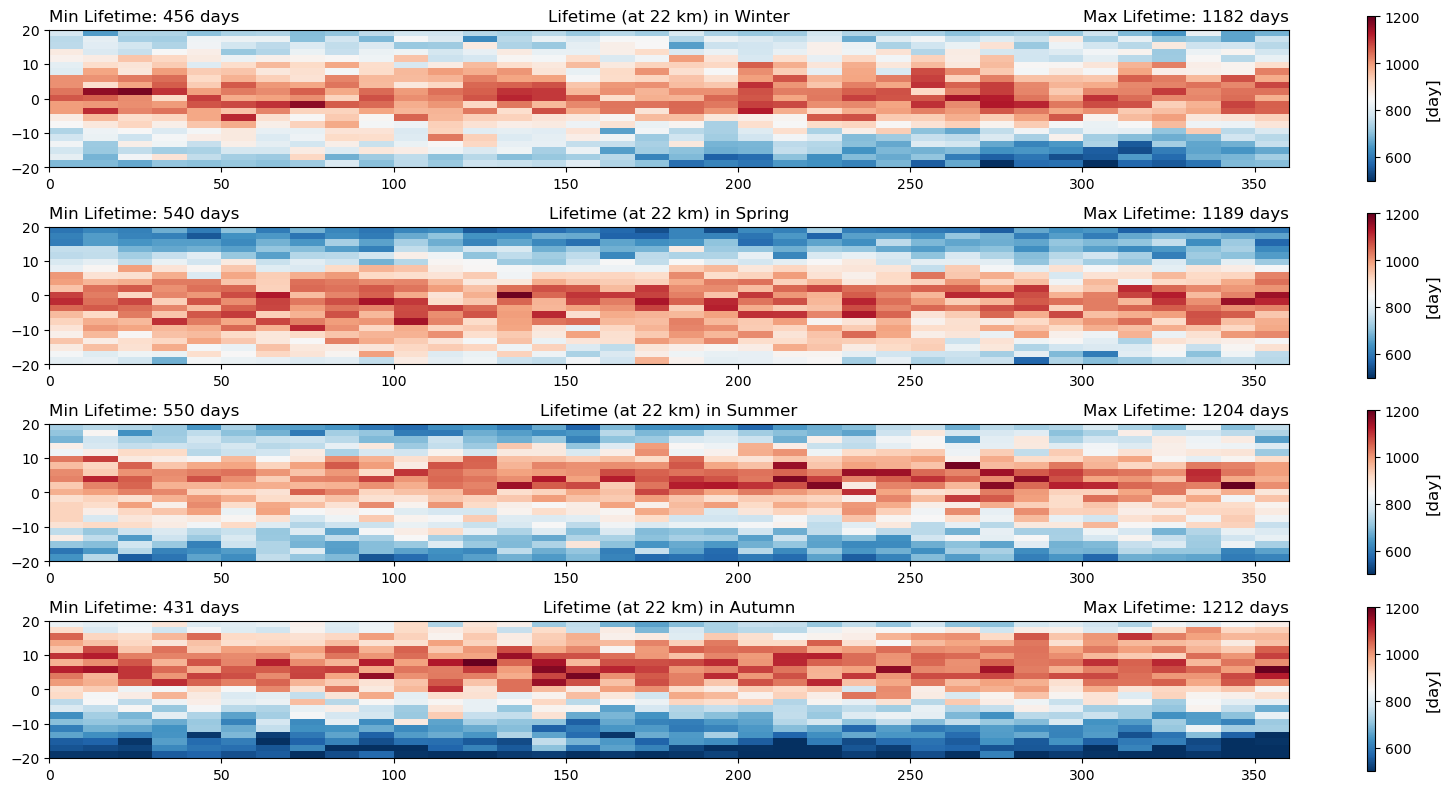

In [33]:
# 22 km

iz = 3

fig = plt.figure(figsize=(20,2.5*4), dpi=100)
extent = [0 , 360 , -20 , 20]


#
ax1 = plt.subplot(4, 1, 1)
ax1_pixel = plt.imshow(lifetime_season_mean[iz,:,:,0], vmin=500, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[day]', fontsize=12);

ax1.set_title(f"Lifetime (at {Height[iz]} km) in Winter", fontsize=12);
ax1.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,0]))} days", loc='right', fontsize=12);
ax1.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,0]))} days", loc='left', fontsize=12);


#
ax2 = plt.subplot(4, 1, 2)
ax2_pixel = plt.imshow(lifetime_season_mean[iz,:,:,1], vmin=500, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[day]', fontsize=12);

ax2.set_title(f"Lifetime (at {Height[iz]} km) in Spring", fontsize=12);
ax2.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,1]))} days", loc='right', fontsize=12);
ax2.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,1]))} days", loc='left', fontsize=12);


#
ax3 = plt.subplot(4, 1, 3)
ax3_pixel = plt.imshow(lifetime_season_mean[iz,:,:,2], vmin=500, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb3 = plt.colorbar(ax3_pixel, ax=ax3)
cb3.set_label('[day]', fontsize=12);

ax3.set_title(f"Lifetime (at {Height[iz]} km) in Summer", fontsize=12);
ax3.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,2]))} days", loc='right', fontsize=12);
ax3.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,2]))} days", loc='left', fontsize=12);


#
ax4 = plt.subplot(4, 1, 4)
ax4_pixel = plt.imshow(lifetime_season_mean[iz,:,:,3], vmin=500, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4)
cb4.set_label('[day]', fontsize=12);

ax4.set_title(f"Lifetime (at {Height[iz]} km) in Autumn", fontsize=12);
ax4.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,3]))} days", loc='right', fontsize=12);
ax4.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,3]))} days", loc='left', fontsize=12);

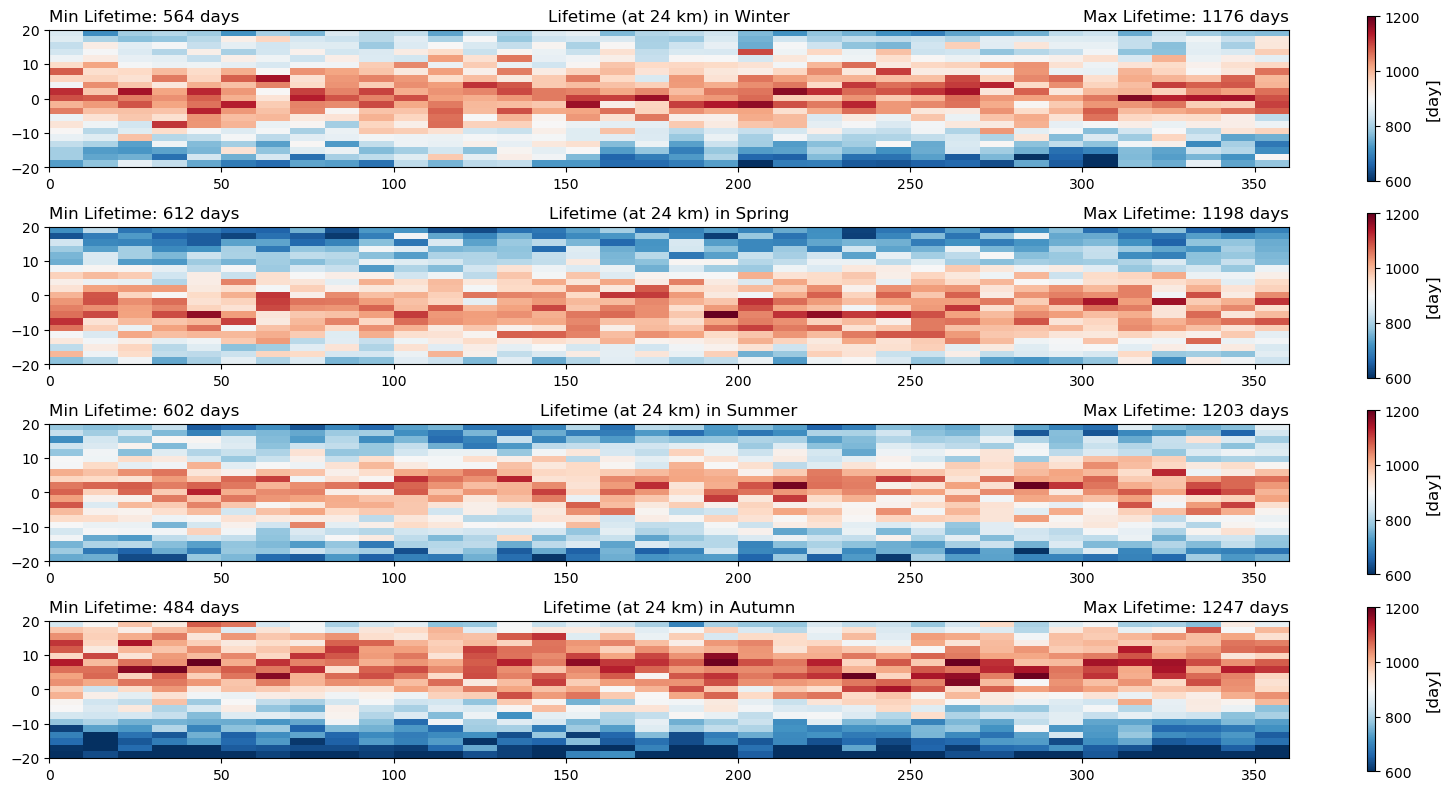

In [36]:
# 24 km

iz = 4

fig = plt.figure(figsize=(20,2.5*4), dpi=100)
extent = [0 , 360 , -20 , 20]


#
ax1 = plt.subplot(4, 1, 1)
ax1_pixel = plt.imshow(lifetime_season_mean[iz,:,:,0], vmin=600, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[day]', fontsize=12);

ax1.set_title(f"Lifetime (at {Height[iz]} km) in Winter", fontsize=12);
ax1.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,0]))} days", loc='right', fontsize=12);
ax1.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,0]))} days", loc='left', fontsize=12);


#
ax2 = plt.subplot(4, 1, 2)
ax2_pixel = plt.imshow(lifetime_season_mean[iz,:,:,1], vmin=600, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[day]', fontsize=12);

ax2.set_title(f"Lifetime (at {Height[iz]} km) in Spring", fontsize=12);
ax2.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,1]))} days", loc='right', fontsize=12);
ax2.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,1]))} days", loc='left', fontsize=12);

#
ax3 = plt.subplot(4, 1, 3)
ax3_pixel = plt.imshow(lifetime_season_mean[iz,:,:,2], vmin=600, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb3 = plt.colorbar(ax3_pixel, ax=ax3)
cb3.set_label('[day]', fontsize=12);

ax3.set_title(f"Lifetime (at {Height[iz]} km) in Summer", fontsize=12);
ax3.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,2]))} days", loc='right', fontsize=12);
ax3.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,2]))} days", loc='left', fontsize=12);

#
ax4 = plt.subplot(4, 1, 4)
ax4_pixel = plt.imshow(lifetime_season_mean[iz,:,:,3], vmin=600, vmax=1200,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4)
cb4.set_label('[day]', fontsize=12);

ax4.set_title(f"Lifetime (at {Height[iz]} km) in Autumn", fontsize=12);
ax4.set_title(f"Max Lifetime: {int(np.max(lifetime_season_mean[iz,:,:,3]))} days", loc='right', fontsize=12);
ax4.set_title(f"Min Lifetime: {int(np.min(lifetime_season_mean[iz,:,:,3]))} days", loc='left', fontsize=12);


In [ ]:
# First try: select a fixed area: lat:(-10:10); lon:(200:360)

In [99]:
# select: lat:(-10:10); lon:(200:360)

iy1 = int(Ny/4)
iy2 = int(Ny/4*3)
ix1 = 20
ix2 = Nx

In [100]:
# lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_mean_z_mon_year = np.mean(lifetime, axis=(1,2,3))

lifetime_mean2_z_mon_year = np.mean( lifetime[:, iy1:iy2, ix1:ix2, :, :, :], axis=(1,2,3) )

print(lifetime_mean_z_mon_year.shape, lifetime_mean2_z_mon_year.shape)

(5, 12, 3) (5, 12, 3)


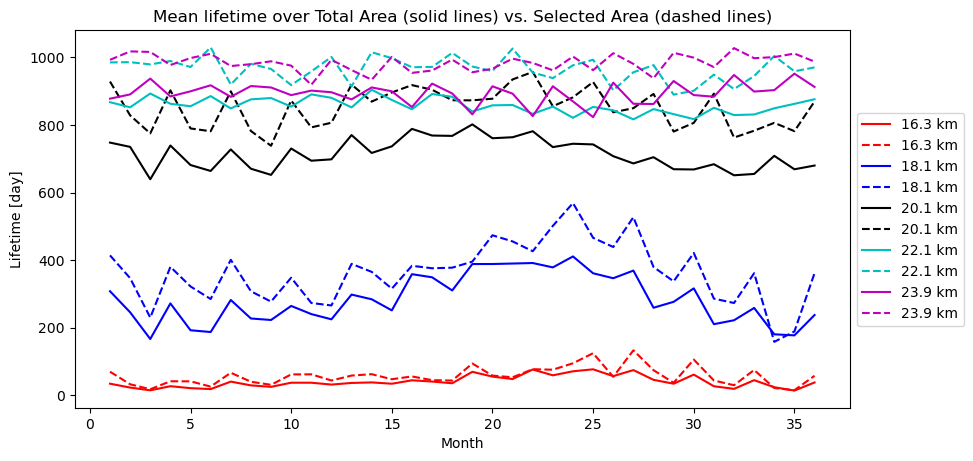

In [102]:
fig = plt.figure(figsize=(10,5), dpi=100)

colors = ["r", "b", "k", "c", "m"]

for iz in range(Nz):
    plt.plot(np.arange(1,37,1), lifetime_mean_z_mon_year[iz,:,:].flatten(),  c=colors[iz], linestyle='-', label=f"{Height[iz]} km")
    plt.plot(np.arange(1,37,1), lifetime_mean2_z_mon_year[iz,:,:].flatten(), c=colors[iz], linestyle='--',  label=f"{Height[iz]} km")

plt.xlabel('Month')
plt.ylabel('Lifetime [day]')

plt.title("Mean lifetime over Total Area (solid lines) vs. Selected Area (dashed lines)")
    
plt.legend(bbox_to_anchor=(1, 0.8));

In [103]:
# lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_mean_z  = np.mean( lifetime, axis=(1,2,3,4,5))

lifetime_mean2_z = np.mean( lifetime[:, iy1:iy2, ix1:ix2, :, :, :], axis=(1,2,3,4,5) )

print(lifetime_mean_z.shape, lifetime_mean2_z.shape)

(5,) (5,)


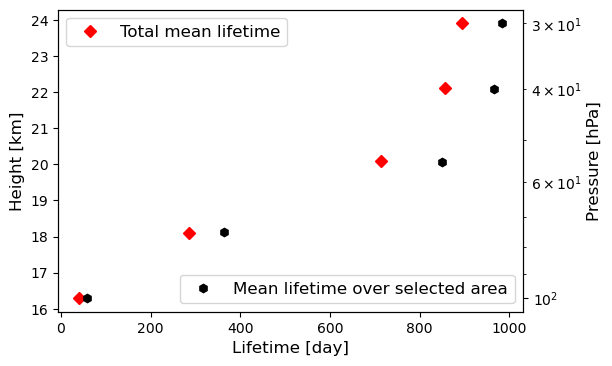

In [108]:
Pressure = [100, 75, 55, 40, 30] # hPa
Height = [16.3, 18.1, 20.1, 22.1, 23.9] # km

fig, ax1 = plt.subplots(figsize=(6,4), dpi=100)

ax2 = ax1.twinx()

ax1.plot(lifetime_mean_z, Height, 'rD', label='Total mean lifetime')

ax1.set_xlabel('Lifetime [day]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)


#
ax2.plot(lifetime_mean2_z, Pressure, 'kh', label='Mean lifetime over selected area')
# ax2.plot(Life_99th, Pressure, 'bx', label='99.9th percentile')
# ax2.plot(Life_90th, Pressure, 'k*', label='99th precentile')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()

ax1.legend(loc='upper left', fontsize=12);
ax2.legend(loc="lower right", fontsize=12);

# plt.title('Mean lifetime at different height over Total Aera', fontsize=14);

In [124]:
# Second try: select top 10% max lifetime area for each season


print(lifetime_season.shape)
print(lifetime_season_mean.shape)

lifetime_z_season_yr_top = np.zeros((Nz, N_season, N_year))

# top mean
percent = 0.1
Num_top = int(Nx*Ny*percent)
print(Num_top)
        

for iz in range(Nz):
    for i_s in range(N_season):
        a1 = lifetime_season_mean[iz,:,:,i_s].flatten()
        idx_sorted = a1.argsort()
        
        for iyr in range(N_year):
            a2 = lifetime_season[iz,:,:,i_s,iyr].flatten()
            lifetime_z_season_yr_top[iz,i_s,iyr] = np.mean(a2[idx_sorted[-Num_top::]])
    
    
lifetime_z_season_top = np.mean(lifetime_z_season_yr_top, axis=2)
lifetime_z_top = np.mean(lifetime_z_season_top, axis=1)
print("lifetime_z_season_yr_top.shape:",lifetime_z_season_yr_top.shape)
print("lifetime_z_season_top.shape:",lifetime_z_season_top.shape)
print("lifetime_z_top.shape:",lifetime_z_top.shape)
print(lifetime_z_top)

lifetime_z_season_yr_mean = np.mean(lifetime_season, axis=(1,2))
lifetime_z_season_mean = np.mean(lifetime_season_mean, axis=(1,2))
lifetime_z_mean = np.mean(lifetime_z_season_mean, axis=1)
print("lifetime_z_season_yr_mean.shape:", lifetime_z_season_yr_mean.shape)
print("lifetime_z_season_mean.shape:", lifetime_z_season_mean.shape)
print("lifetime_z_mean.shape:", lifetime_z_mean.shape)


(5, 21, 36, 4, 3)
(5, 21, 36, 4)
75
lifetime_z_season_yr_top.shape: (5, 4, 3)
lifetime_z_season_top.shape: (5, 4)
lifetime_z_top.shape: (5,)
[  92.99351852  465.52640741  996.42922222 1089.20911111 1095.9027037 ]
lifetime_z_season_yr_mean.shape: (5, 4, 3)
lifetime_z_season_mean.shape: (5, 4)
lifetime_z_mean.shape: (5,)


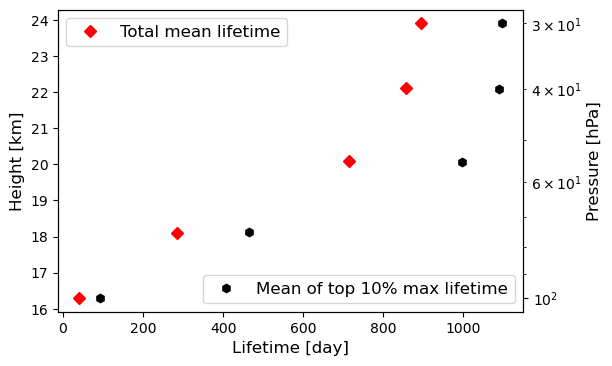

In [125]:
Pressure = [100, 75, 55, 40, 30] # hPa
Height = [16.3, 18.1, 20.1, 22.1, 23.9] # km

fig, ax1 = plt.subplots(figsize=(6,4), dpi=100)

ax2 = ax1.twinx()

ax1.plot(lifetime_z_mean, Height, 'rD', label='Total mean lifetime')

ax1.set_xlabel('Lifetime [day]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)


#
ax2.plot(lifetime_z_top, Pressure, 'kh', label=f'Mean of top {int(percent*100)}% max lifetime')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()

ax1.legend(loc='upper left', fontsize=12);
ax2.legend(loc="lower right", fontsize=12);

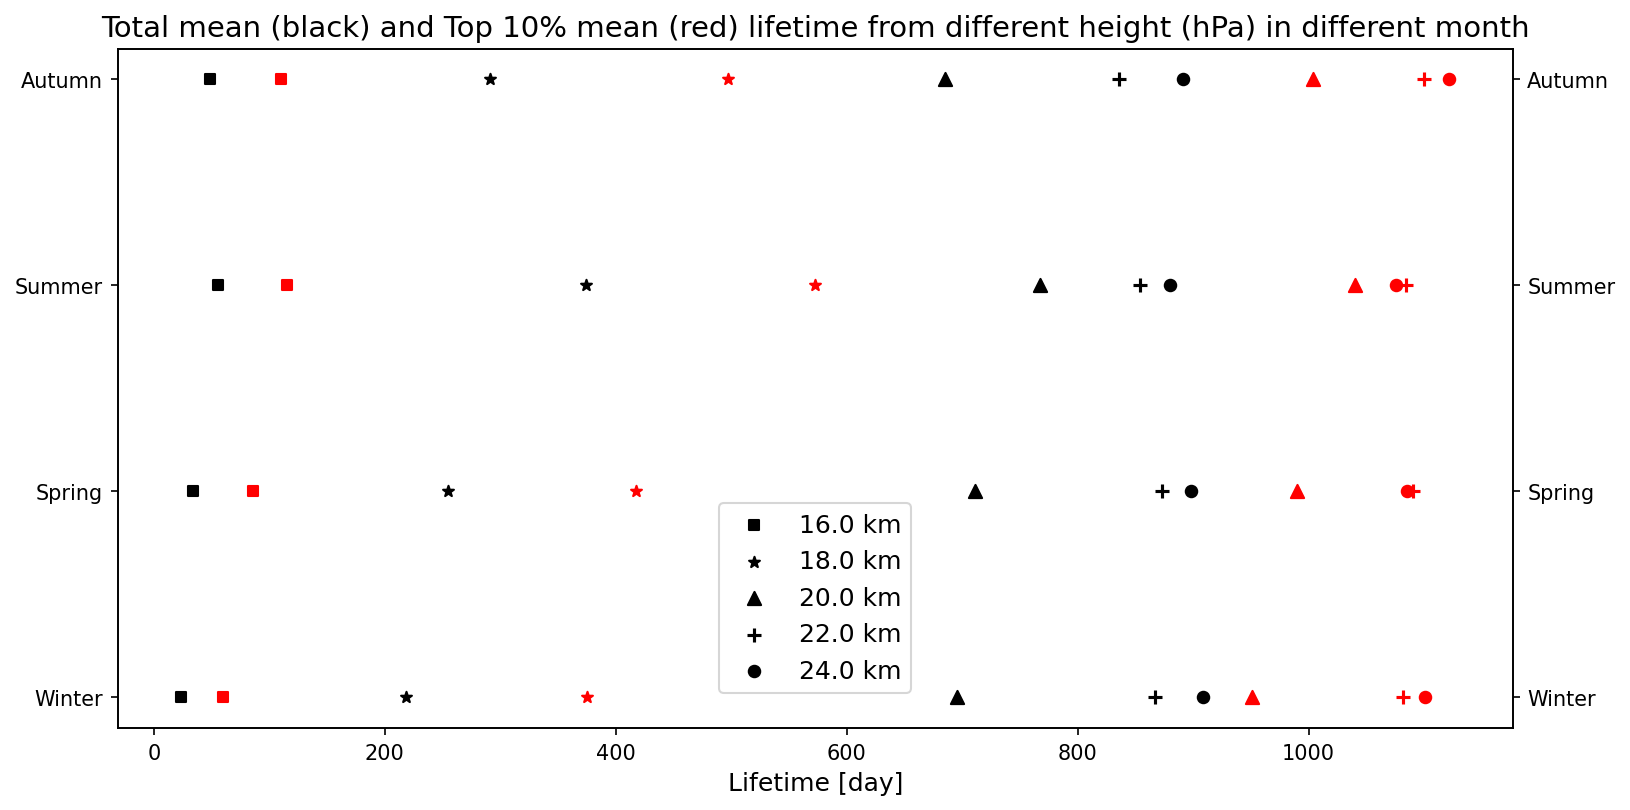

In [130]:
fig, ax1 = plt.subplots(figsize=(12,6), dpi=150)

ax2 = ax1.twinx()

colors = ['red','blue','orange','purple','cyan']
markers = ['s','*','^','+','o']
sizes = [20,30,40,50,30]

Seasons = ["Winter","Spring","Summer","Autumn"]

###
for i in range(Nz):
    ax1.scatter(lifetime_z_season_mean[i,:], Seasons, c='k', marker=markers[i], s=sizes[i], label=f"{np.round(Height[i])} km")
#     ax2.scatter(lifetime_z_month_max[i,:], Mons, c=colors[i], marker=markers[i], s=sizes[i], label=Pressure[i])
    ax2.scatter(lifetime_z_season_top[i,:], Seasons, c='r', marker=markers[i], s=sizes[i], label=f"{np.round(Height[i])} km")


ax1.set_xlabel('Lifetime [day]', fontsize=12)
# ax1.set_ylabel('', fontsize=12)


ax1.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.5, 0.35));
# ax2.legend(loc="upper center", fontsize=12, bbox_to_anchor=(0.74, 0.75));

plt.title(f'Total mean (black) and Top {int(percent*100)}% mean (red) lifetime from different height (hPa) in different month', fontsize=14);


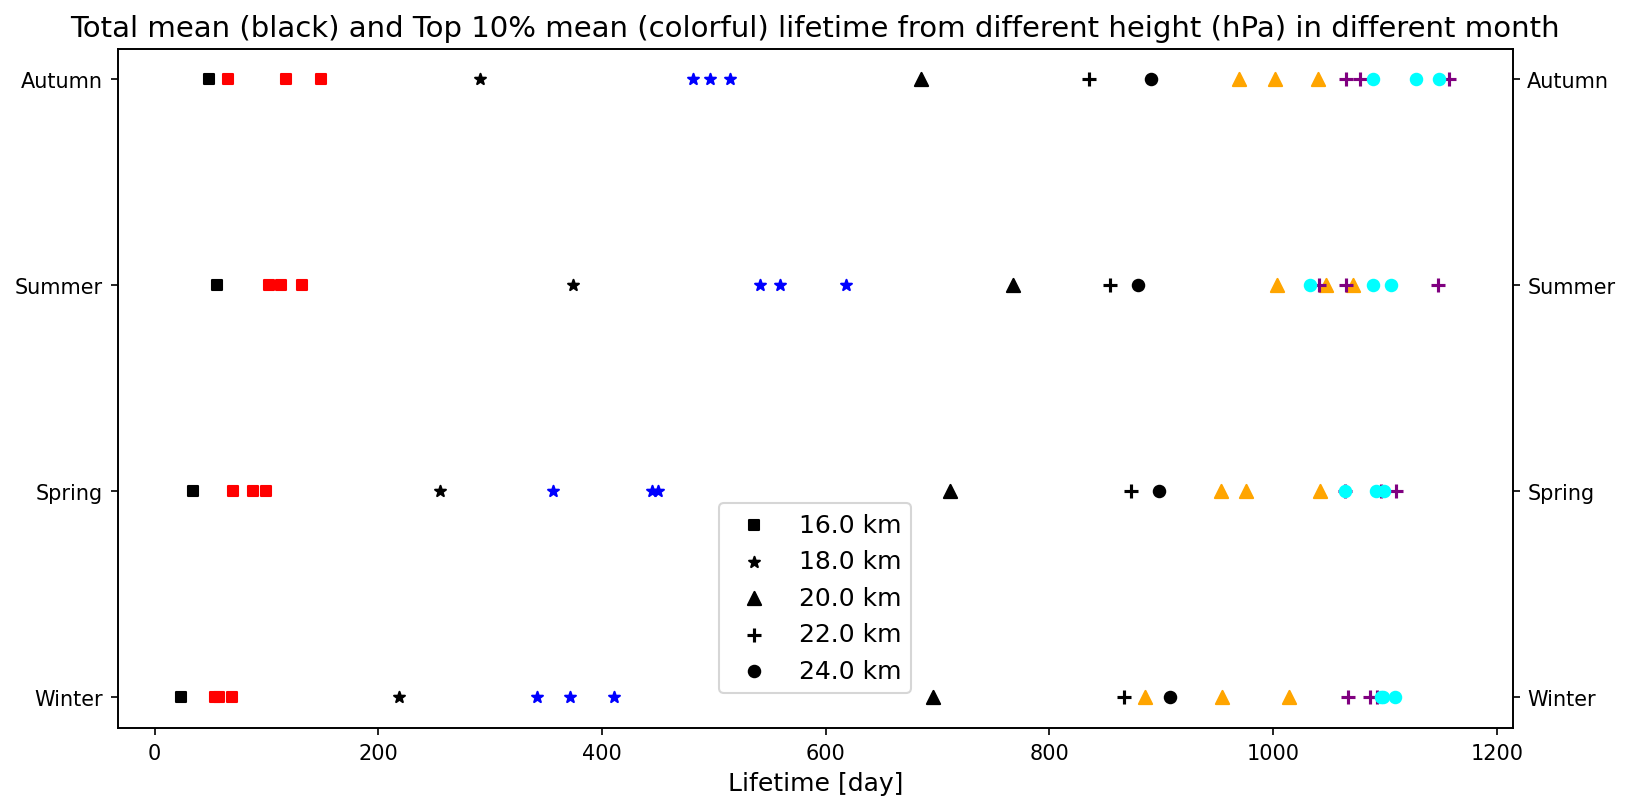

In [131]:
fig, ax1 = plt.subplots(figsize=(12,6), dpi=150)

ax2 = ax1.twinx()

colors = ['red','blue','orange','purple','cyan']
markers = ['s','*','^','+','o']
sizes = [20,30,40,50,30]

Seasons = ["Winter","Spring","Summer","Autumn"]

###
for i in range(Nz):
    ax1.scatter(lifetime_z_season_mean[i,:], Seasons, c='k', marker=markers[i], s=sizes[i], label=f"{np.round(Height[i])} km")
#     ax2.scatter(lifetime_z_month_max[i,:], Mons, c=colors[i], marker=markers[i], s=sizes[i], label=Pressure[i])
    ax2.scatter(lifetime_z_season_yr_top[i,:,0], Seasons, c=colors[i], marker=markers[i], s=sizes[i], label=f"{np.round(Height[i])} km")
    ax2.scatter(lifetime_z_season_yr_top[i,:,1], Seasons, c=colors[i], marker=markers[i], s=sizes[i])
    ax2.scatter(lifetime_z_season_yr_top[i,:,2], Seasons, c=colors[i], marker=markers[i], s=sizes[i])


ax1.set_xlabel('Lifetime [day]', fontsize=12)
# ax1.set_ylabel('Month', fontsize=12)


ax1.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.5, 0.35));
# ax2.legend(loc="upper center", fontsize=12, bbox_to_anchor=(0.74, 0.75));

plt.title(f'Total mean (black) and Top {int(percent*100)}% mean (colorful) lifetime from different height (hPa) in different month', fontsize=14);
